## Lesson 9 Homework
### TLombardi

**This assignment explores DBSCAN clustering methodology to identify clusters of car crashes along road centerlines in Utah. Source data includes,**
- Crashes: [Utah Open Data](https://opendata.utah.gov/dataset/DDACTS-DDACTSadmin-CRASHLOCATION_data/ni3y-8ecs)
- Road Centerlines: [Utah Automated Geographic Reference Center](https://gis.utah.gov/data/transportation/roads-system/)

#### Functionality for this iteration include:

1. [Find the intersection of crashes to center line](#crash_intersection)
2. [Find the cluster of crashes with respect to road centerline](#cluster_scikit-learn)
3. [Plot clusters as snapped points using matplotlib](#plot)
4. [Perform clustering using ArcGIS Pro](#cluster_Pro)

In [11]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import DBSCAN

##### Find the intersection of crashes to center lines <a id='crash_intersection'><a/>

For this step I prepped data in ArcGIS Pro and exported a .csv file for use in the notebook.

In [12]:
# arcpy.management.SelectLayerByLocation("Crashes", "INTERSECT", "UtahRoads", "1 Meters", "NEW_SELECTION", "NOT_INVERT")
# arcpy.conversion.FeatureClassToFeatureClass("Crashes", r"C:\Users\TVL\Documents\ArcGIS\Projects\GeoAI\Lesson9_UtahCrashes\Lesson9_UtahCrashes.gdb", "CenterlineCrashes", '', 'the_geom "the_geom" true true false 5000 Text 0 0,First,#,Crashes,the_geom,0,5000;OBJECTID_1 "OBJECTID" true true false 4 Long 0 0,First,#,Crashes,OBJECTID_1,-1,-1;crash_id "crash_id" true true false 4 Long 0 0,First,#,Crashes,crash_id,-1,-1;crash_date "crash_date" true true false 5000 Text 0 0,First,#,Crashes,crash_date,0,5000;crash_year "crash_year" true true false 4 Long 0 0,First,#,Crashes,crash_year,-1,-1;crash_month "crash_month" true true false 4 Long 0 0,First,#,Crashes,crash_month,-1,-1;crash_day "crash_day" true true false 4 Long 0 0,First,#,Crashes,crash_day,-1,-1;crash_hour "crash_hour" true true false 4 Long 0 0,First,#,Crashes,crash_hour,-1,-1;crash_minute "crash_minute" true true false 4 Long 0 0,First,#,Crashes,crash_minute,-1,-1;construction "construction" true true false 4 Long 0 0,First,#,Crashes,construction,-1,-1;weather_condition "weather_condition" true true false 5000 Text 0 0,First,#,Crashes,weather_condition,0,5000;road_condition "road_condition" true true false 5000 Text 0 0,First,#,Crashes,road_condition,0,5000;event "event" true true false 5000 Text 0 0,First,#,Crashes,event,0,5000;collision_type "collision_type" true true false 5000 Text 0 0,First,#,Crashes,collision_type,0,5000;severity "severity" true true false 5000 Text 0 0,First,#,Crashes,severity,0,5000;case_number "case_number" true true false 5000 Text 0 0,First,#,Crashes,case_number,0,5000;officer_name "officer_name" true true false 5000 Text 0 0,First,#,Crashes,officer_name,0,5000;officer_department "officer_department" true true false 5000 Text 0 0,First,#,Crashes,officer_department,0,5000;road_name "road_name" true true false 5000 Text 0 0,First,#,Crashes,road_name,0,5000;road_type "road_type" true true false 5000 Text 0 0,First,#,Crashes,road_type,0,5000;route_number "route_number" true true false 4 Long 0 0,First,#,Crashes,route_number,-1,-1;milepost "milepost" true true false 8 Double 0 0,First,#,Crashes,milepost,-1,-1;city "city" true true false 5000 Text 0 0,First,#,Crashes,city,0,5000;county "county" true true false 5000 Text 0 0,First,#,Crashes,county,0,5000;utm_x "utm_x" true true false 8 Double 0 0,First,#,Crashes,utm_x,-1,-1;utm_y "utm_y" true true false 8 Double 0 0,First,#,Crashes,utm_y,-1,-1', '')
# arcpy.conversion.TableToTable("CenterlineCrashes", r"C:\Users\TVL\Desktop\JHU\SP20_GeoAI\Lesson09", "CenterlineCrashes.csv", '', r'the_geom "the_geom" true true false 5000 Text 0 0,First,#,C:\Users\TVL\Documents\ArcGIS\Projects\GeoAI\Lesson9_UtahCrashes\Lesson9_UtahCrashes.gdb\CenterlineCrashes,the_geom,0,5000;OBJECTID_1 "OBJECTID" true true false 4 Long 0 0,First,#,C:\Users\TVL\Documents\ArcGIS\Projects\GeoAI\Lesson9_UtahCrashes\Lesson9_UtahCrashes.gdb\CenterlineCrashes,OBJECTID_1,-1,-1;crash_id "crash_id" true true false 4 Long 0 0,First,#,C:\Users\TVL\Documents\ArcGIS\Projects\GeoAI\Lesson9_UtahCrashes\Lesson9_UtahCrashes.gdb\CenterlineCrashes,crash_id,-1,-1;crash_date "crash_date" true true false 5000 Text 0 0,First,#,C:\Users\TVL\Documents\ArcGIS\Projects\GeoAI\Lesson9_UtahCrashes\Lesson9_UtahCrashes.gdb\CenterlineCrashes,crash_date,0,5000;crash_year "crash_year" true true false 4 Long 0 0,First,#,C:\Users\TVL\Documents\ArcGIS\Projects\GeoAI\Lesson9_UtahCrashes\Lesson9_UtahCrashes.gdb\CenterlineCrashes,crash_year,-1,-1;crash_month "crash_month" true true false 4 Long 0 0,First,#,C:\Users\TVL\Documents\ArcGIS\Projects\GeoAI\Lesson9_UtahCrashes\Lesson9_UtahCrashes.gdb\CenterlineCrashes,crash_month,-1,-1;crash_day "crash_day" true true false 4 Long 0 0,First,#,C:\Users\TVL\Documents\ArcGIS\Projects\GeoAI\Lesson9_UtahCrashes\Lesson9_UtahCrashes.gdb\CenterlineCrashes,crash_day,-1,-1;crash_hour "crash_hour" true true false 4 Long 0 0,First,#,C:\Users\TVL\Documents\ArcGIS\Projects\GeoAI\Lesson9_UtahCrashes\Lesson9_UtahCrashes.gdb\CenterlineCrashes,crash_hour,-1,-1;crash_minute "crash_minute" true true false 4 Long 0 0,First,#,C:\Users\TVL\Documents\ArcGIS\Projects\GeoAI\Lesson9_UtahCrashes\Lesson9_UtahCrashes.gdb\CenterlineCrashes,crash_minute,-1,-1;construction "construction" true true false 4 Long 0 0,First,#,C:\Users\TVL\Documents\ArcGIS\Projects\GeoAI\Lesson9_UtahCrashes\Lesson9_UtahCrashes.gdb\CenterlineCrashes,construction,-1,-1;weather_condition "weather_condition" true true false 5000 Text 0 0,First,#,C:\Users\TVL\Documents\ArcGIS\Projects\GeoAI\Lesson9_UtahCrashes\Lesson9_UtahCrashes.gdb\CenterlineCrashes,weather_condition,0,5000;road_condition "road_condition" true true false 5000 Text 0 0,First,#,C:\Users\TVL\Documents\ArcGIS\Projects\GeoAI\Lesson9_UtahCrashes\Lesson9_UtahCrashes.gdb\CenterlineCrashes,road_condition,0,5000;event "event" true true false 5000 Text 0 0,First,#,C:\Users\TVL\Documents\ArcGIS\Projects\GeoAI\Lesson9_UtahCrashes\Lesson9_UtahCrashes.gdb\CenterlineCrashes,event,0,5000;collision_type "collision_type" true true false 5000 Text 0 0,First,#,C:\Users\TVL\Documents\ArcGIS\Projects\GeoAI\Lesson9_UtahCrashes\Lesson9_UtahCrashes.gdb\CenterlineCrashes,collision_type,0,5000;severity "severity" true true false 5000 Text 0 0,First,#,C:\Users\TVL\Documents\ArcGIS\Projects\GeoAI\Lesson9_UtahCrashes\Lesson9_UtahCrashes.gdb\CenterlineCrashes,severity,0,5000;case_number "case_number" true true false 5000 Text 0 0,First,#,C:\Users\TVL\Documents\ArcGIS\Projects\GeoAI\Lesson9_UtahCrashes\Lesson9_UtahCrashes.gdb\CenterlineCrashes,case_number,0,5000;officer_name "officer_name" true true false 5000 Text 0 0,First,#,C:\Users\TVL\Documents\ArcGIS\Projects\GeoAI\Lesson9_UtahCrashes\Lesson9_UtahCrashes.gdb\CenterlineCrashes,officer_name,0,5000;officer_department "officer_department" true true false 5000 Text 0 0,First,#,C:\Users\TVL\Documents\ArcGIS\Projects\GeoAI\Lesson9_UtahCrashes\Lesson9_UtahCrashes.gdb\CenterlineCrashes,officer_department,0,5000;road_name "road_name" true true false 5000 Text 0 0,First,#,C:\Users\TVL\Documents\ArcGIS\Projects\GeoAI\Lesson9_UtahCrashes\Lesson9_UtahCrashes.gdb\CenterlineCrashes,road_name,0,5000;road_type "road_type" true true false 5000 Text 0 0,First,#,C:\Users\TVL\Documents\ArcGIS\Projects\GeoAI\Lesson9_UtahCrashes\Lesson9_UtahCrashes.gdb\CenterlineCrashes,road_type,0,5000;route_number "route_number" true true false 4 Long 0 0,First,#,C:\Users\TVL\Documents\ArcGIS\Projects\GeoAI\Lesson9_UtahCrashes\Lesson9_UtahCrashes.gdb\CenterlineCrashes,route_number,-1,-1;milepost "milepost" true true false 8 Double 0 0,First,#,C:\Users\TVL\Documents\ArcGIS\Projects\GeoAI\Lesson9_UtahCrashes\Lesson9_UtahCrashes.gdb\CenterlineCrashes,milepost,-1,-1;city "city" true true false 5000 Text 0 0,First,#,C:\Users\TVL\Documents\ArcGIS\Projects\GeoAI\Lesson9_UtahCrashes\Lesson9_UtahCrashes.gdb\CenterlineCrashes,city,0,5000;county "county" true true false 5000 Text 0 0,First,#,C:\Users\TVL\Documents\ArcGIS\Projects\GeoAI\Lesson9_UtahCrashes\Lesson9_UtahCrashes.gdb\CenterlineCrashes,county,0,5000;utm_x "utm_x" true true false 8 Double 0 0,First,#,C:\Users\TVL\Documents\ArcGIS\Projects\GeoAI\Lesson9_UtahCrashes\Lesson9_UtahCrashes.gdb\CenterlineCrashes,utm_x,-1,-1;utm_y "utm_y" true true false 8 Double 0 0,First,#,C:\Users\TVL\Documents\ArcGIS\Projects\GeoAI\Lesson9_UtahCrashes\Lesson9_UtahCrashes.gdb\CenterlineCrashes,utm_y,-1,-1', '')

In [13]:
# Read file paths
crash_path = "C:/Users/TVL/Desktop/JHU/SP20_GeoAI/Lesson09/CenterlineCrashes.csv"

In [14]:
# Read the files
crashes = pd.read_csv(crash_path, 
                         delimiter=',',
                         index_col=1)

In [15]:
crashes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200450 entries, POINT (-112.195961500523 41.705980541357) to POINT (-113.544109592385 37.118789033503)
Data columns (total 26 columns):
OBJECTID              200450 non-null int64
OBJECTID_1            200450 non-null int64
crash_id              200450 non-null int64
crash_date            200450 non-null object
crash_year            200450 non-null int64
crash_month           200450 non-null int64
crash_day             200450 non-null int64
crash_hour            200450 non-null int64
crash_minute          200450 non-null int64
construction          200450 non-null int64
weather_condition     199037 non-null object
road_condition        199229 non-null object
event                 199437 non-null object
collision_type        149324 non-null object
severity              200450 non-null object
case_number           200440 non-null object
officer_name          200439 non-null object
officer_department    200440 non-null object
road_name         

In [16]:
crashes.head()

,OBJECTID,OBJECTID_1,crash_id,crash_date,crash_year,crash_month,crash_day,crash_hour,crash_minute,construction,...,officer_name,officer_department,road_name,road_type,route_number,milepost,city,county,utm_x,utm_y
the_geom,,,,,,,,,,,,,,,,,,,,,
POINT (-112.195961500523 41.705980541357),1,1,10918098,01/05/2017 01:30:00 PM +0000,2017,1,5,13,30,0,...,UHP.UT.USA,UTUHP1900,I-84,Mainline,84.0,41.468,OUTSIDE CITY LIMITS,BOX ELDER,400497.832462,4.617823e+06
POINT (-111.890950655091 40.50907424456),2,2,11015745,11/28/2017 07:59:00 AM +0000,2017,11,3,7,59,0,...,UHP.UT.USA,UTUHP1300,I-15,Mainline,15.0,290.090,DRAPER,SALT LAKE,424516.006446,4.484643e+06
POINT (-111.854798359825 40.626080913744),3,3,10964323,05/26/2017 08:14:23 AM +0000,2017,5,6,8,14,0,...,CHPD,UT0184200,7123 S 1300 E,Mainline,2068.0,8.751,COTTONWOOD HEIGHTS,SALT LAKE,427705.000000,4.497601e+06
POINT (-111.866231166344 40.412351332464),4,4,10979800,07/13/2017 03:41:00 AM +0000,2017,7,5,3,41,0,...,UHP.UT.USA,UTUHP1000,I-15,Mainline,15.0,282.100,LEHI,UTAH,426505.000000,4.473886e+06
POINT (-111.790552270941 40.36397439018),5,5,10809271,01/07/2016 05:15:00 PM +0000,2016,1,5,17,15,0,...,UHP.UT.USA,UTUHP1000,I-15,Mainline,15.0,276.785,AMERICAN FORK,UTAH,432878.000000,4.468456e+06


##### Find the cluster of crashes with respect to road centerline using scikit-learn <a id='cluster_scikit-learn'><a/>

In [17]:
# Create the coordinates stack
coords = np.vstack(crashes[['utm_x', 'utm_y']].values)

In [18]:
# Configure the DBSCAN clustering parameters
db = DBSCAN(eps=1000, min_samples=100)
db.fit(coords)

DBSCAN(algorithm='auto', eps=1000, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=100, n_jobs=None, p=None)

In [19]:
# Create the clusters
c = db.fit_predict(crashes[['utm_x', 'utm_y']])

##### Plot clusters as snapped points using matplotlib <a id='plot'><a/>

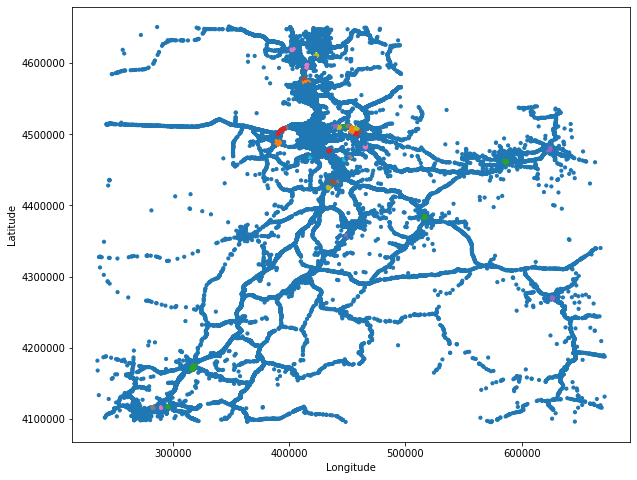

In [20]:
# Plot the clusters
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,8))
ax.scatter(crashes.utm_x.values[:500000], 
           crashes.utm_y.values[:500000],
           s=10,
           c=c,
           cmap='tab10')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

##### Perform clustering using ArcGIS Pro<a id='cluster_Pro'></a>

In this step, I selected crash features that intersected with road centerlines within a distance of 1 meter using the select by location tool. The selection reduced the crash dataset from 256,441 to 200,450 features. I then ran the [Density-based Clustering tool](https://pro.arcgis.com/en/pro-app/tool-reference/spatial-statistics/densitybasedclustering.htm) using defined distance (DBSCAN) and self-adjusting (HDBSCAN) methodologies each with a 100 minimum feature per cluster parameter.  

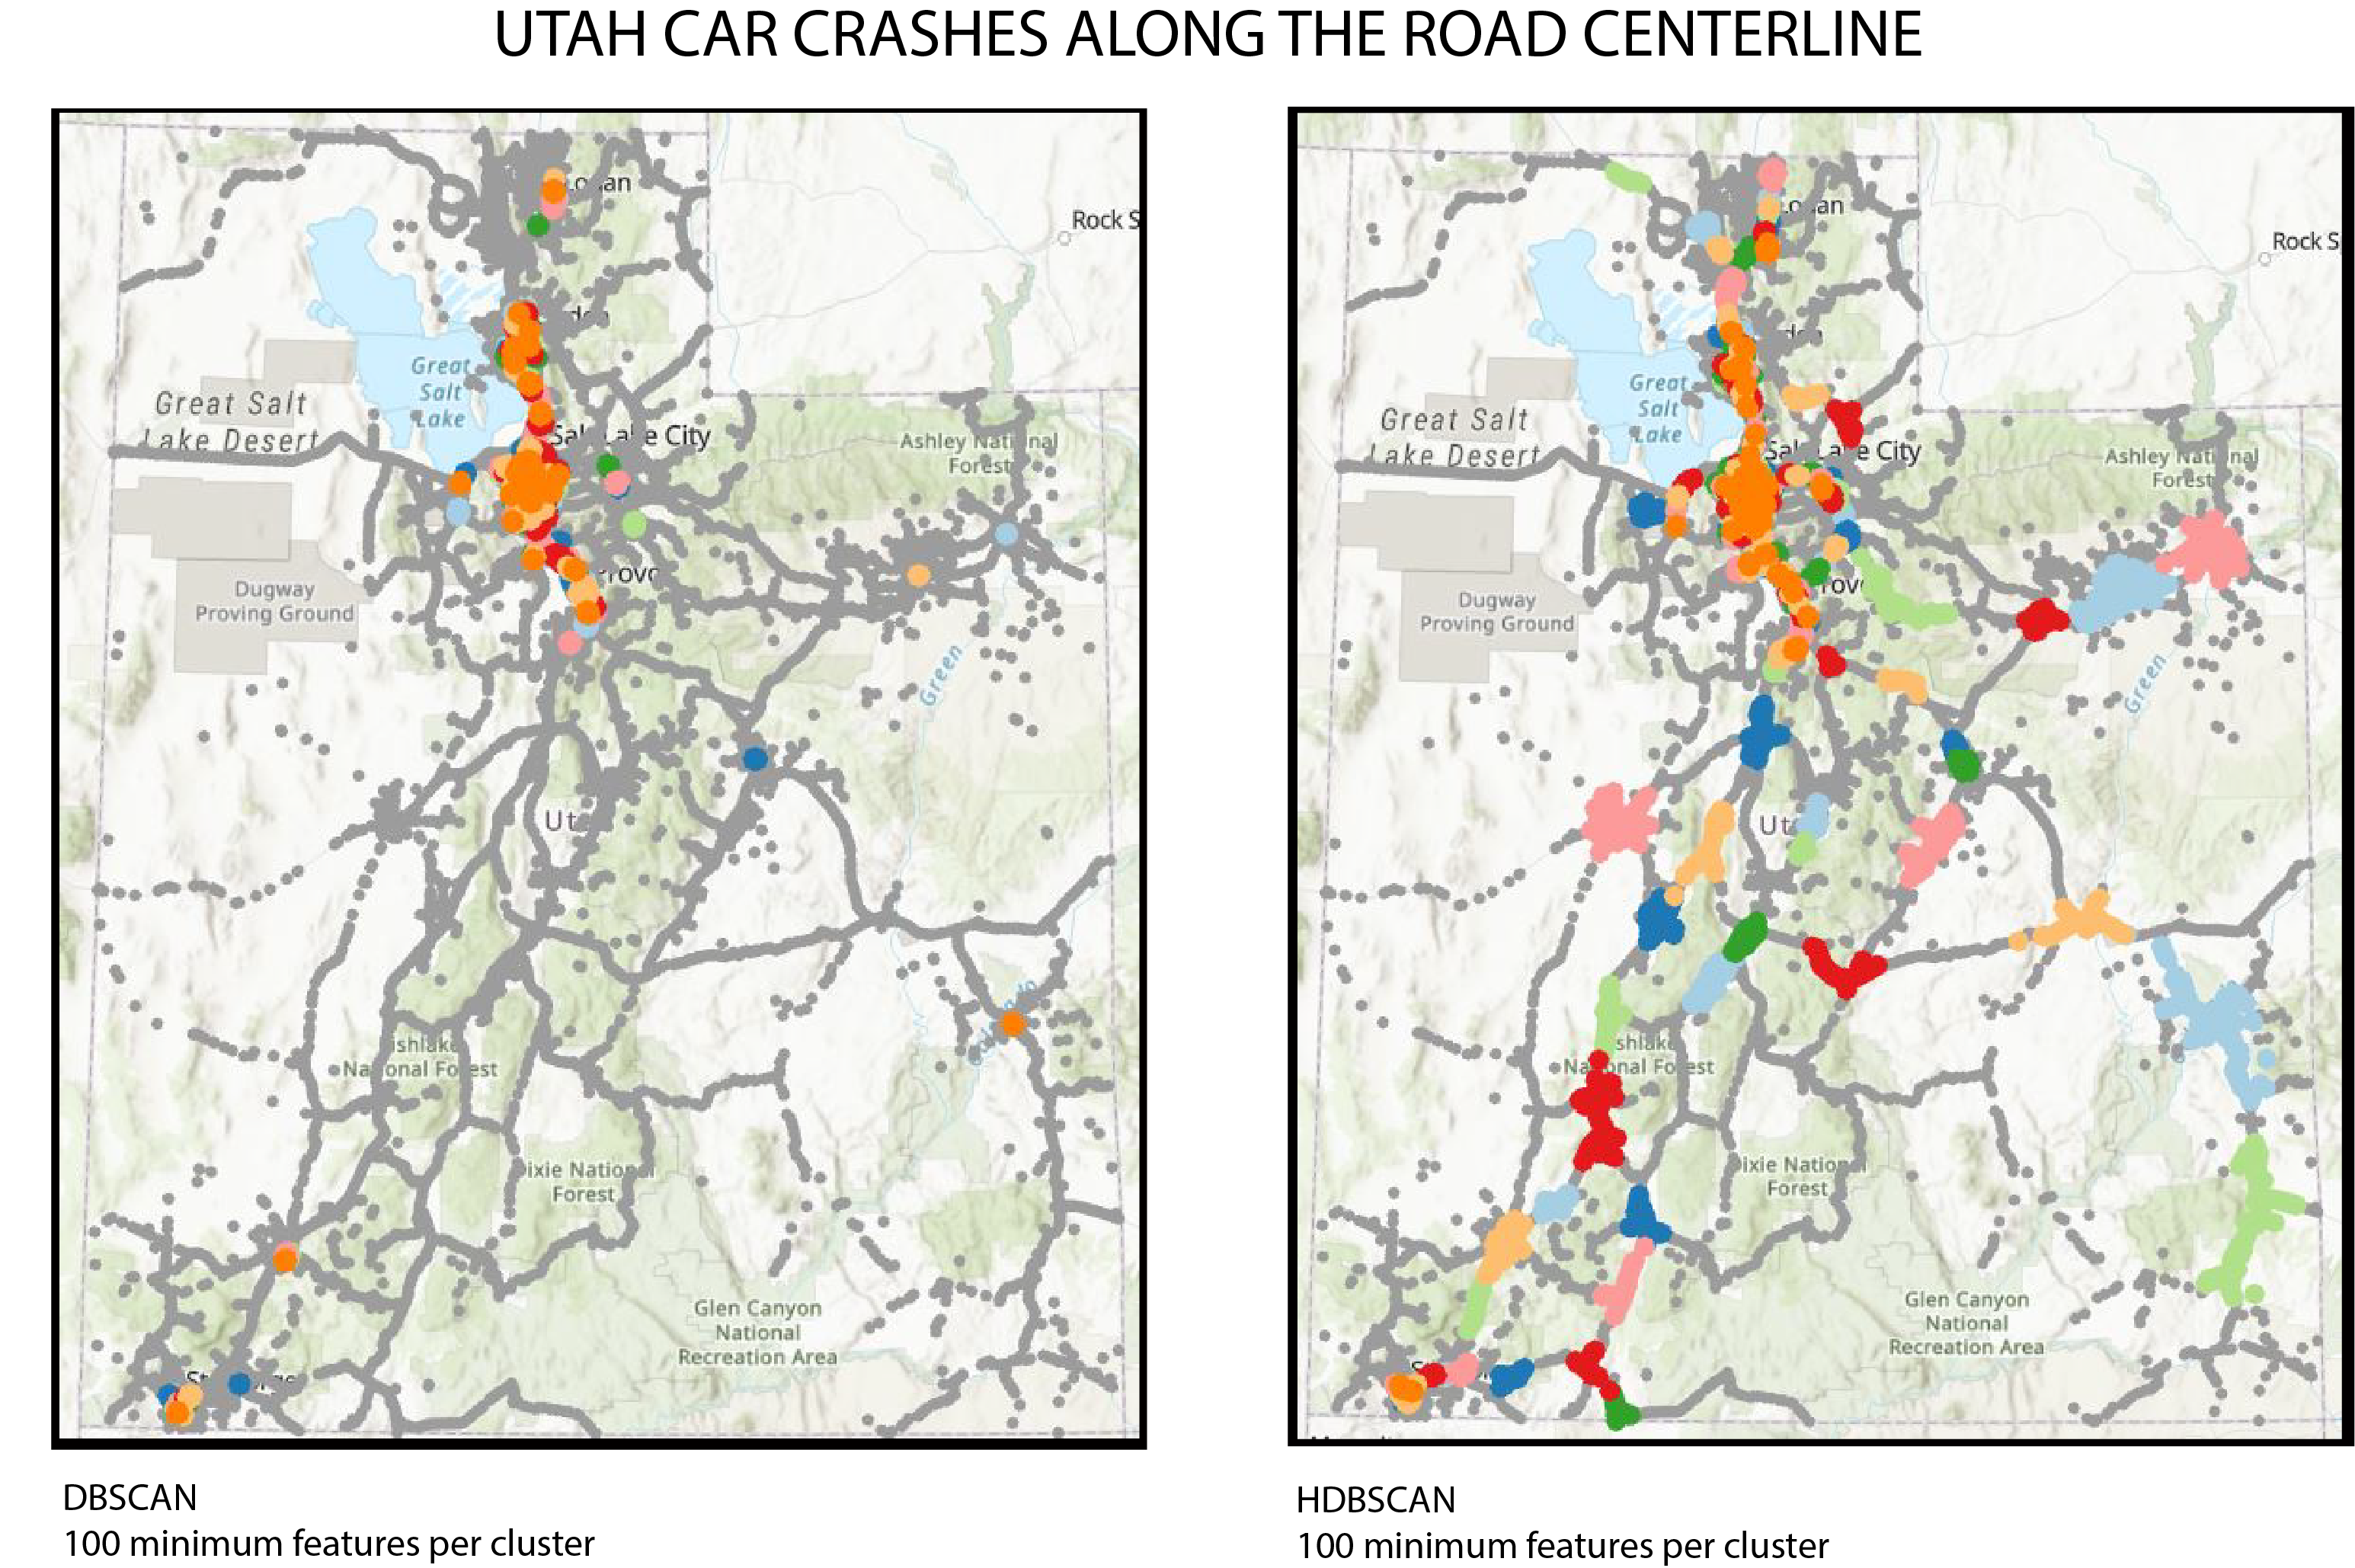

DBSCAN calculated a 407 foot search distance while HDBSCAN used varying distances to identify clusters. HDBSCAN was much better at identifying clusters in both metropolitan and rural areas by incorporating varying search distances. 